In [48]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

#file_path = 'spotify_10_songs.csv'
df_songs = pd.read_csv('spotify_10_songs.csv')#, index_col='artist')

#print(df_songs.columns)
#df_songs.info()
df_songs.columns = df_songs.columns.str.strip()
df_songs['song_name'] = df_songs['song_name'].str.rstrip(' .')
df_songs['song_name'] = df_songs['song_name'].str.split().str[:2].str.join(' ') #shorten the song's name

df_songs.set_index('song_name', inplace=True)
to_drop = ['artist', 'html', 'id', 'time_signature', 'duration_ms', 'mode','key']
df_songs = df_songs.drop(columns=to_drop)
df_songs

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song_name,,,,,,,,,
My Band,0.851,0.84900,-3.383,0.0828,0.49700,0.000002,0.1160,0.8440,120.014
The Real,0.949,0.66100,-4.244,0.0572,0.03020,0.000000,0.0454,0.7600,104.504
Águas De,0.642,0.33900,-15.503,0.1400,0.85400,0.000000,0.1050,0.4910,143.418
The Girl,0.641,0.14000,-16.790,0.0390,0.86700,0.001660,0.1050,0.3880,129.318
"Paint It,",0.464,0.79500,-9.267,0.0926,0.04930,0.002440,0.3990,0.6120,158.691
Sultans Of,0.733,0.79400,-10.023,0.0307,0.06140,0.036700,0.3300,0.9310,148.174
Space Raiders,0.749,0.73100,-10.865,0.1080,0.00314,0.867000,0.1110,0.0598,131.997
In Silence,0.736,0.84500,-12.017,0.0377,0.00548,0.901000,0.1110,0.1980,128.009
"Wiegenlied, Op.",0.184,0.00833,-33.503,0.0519,0.98900,0.596000,0.1040,0.2110,61.541


In [49]:
# Calculate the Euclidean distances between all pairs of students in the foods_df DataFrame
distances_array = pairwise_distances(df_songs, metric='euclidean')

# Create a Pandas DataFrame from the distances_array
songs_not_scaled_distances = pd.DataFrame(distances_array,
                                      index=df_songs.index,
                                      columns=df_songs.index,)

# Display the Euclidean distances DataFrame
songs_not_scaled_distances

song_name,My Band,The Real,Águas De,The Girl,"Paint It,",Sultans Of,Space Raiders,In Silence,"Wiegenlied, Op.",Nocturne en
song_name,,,,,,,,,,
My Band,0.000000,15.542746,26.366662,16.346428,39.128237,28.936816,14.184786,11.830130,65.791009,62.301344
The Real,15.542746,0.000000,40.521893,27.827065,54.423003,44.052734,28.301893,24.781378,52.004798,47.656645
Águas De,26.366662,40.521893,0.000000,14.160754,16.527030,7.331506,12.400728,15.858199,83.836876,82.445621
The Girl,16.346428,27.827065,14.160754,0.000000,30.342003,20.069204,6.652157,5.156377,69.811689,68.290930
"Paint It,",39.128237,54.423003,16.527030,30.342003,0.000000,10.552860,26.764646,30.823543,100.138346,98.427807
Sultans Of,28.936816,44.052734,7.331506,20.069204,10.552860,0.000000,16.245437,20.296337,89.773320,87.931086
Space Raiders,14.184786,28.301893,12.400728,6.652157,26.764646,16.245437,0.000000,4.155673,74.016484,71.858247
In Silence,11.830130,24.781378,15.858199,5.156377,30.823543,20.296337,4.155673,0.000000,69.869226,67.725920
"Wiegenlied, Op.",65.791009,52.004798,83.836876,69.811689,100.138346,89.773320,74.016484,69.869226,0.000000,8.814374


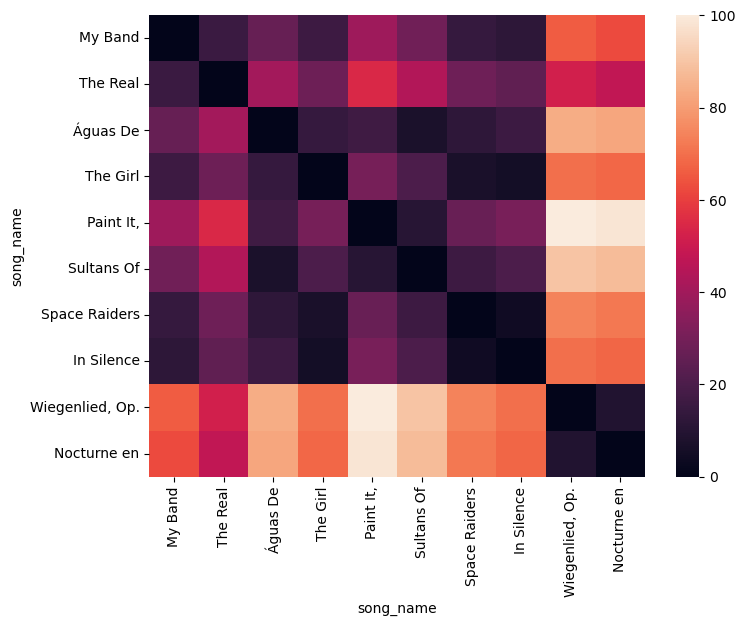

In [50]:
# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(8, 6))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(songs_not_scaled_distances);

In [51]:
#Min and Max Scaling

# Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas") 
# Scale the df_songs
df__minmax = scaler.fit_transform(df_songs)

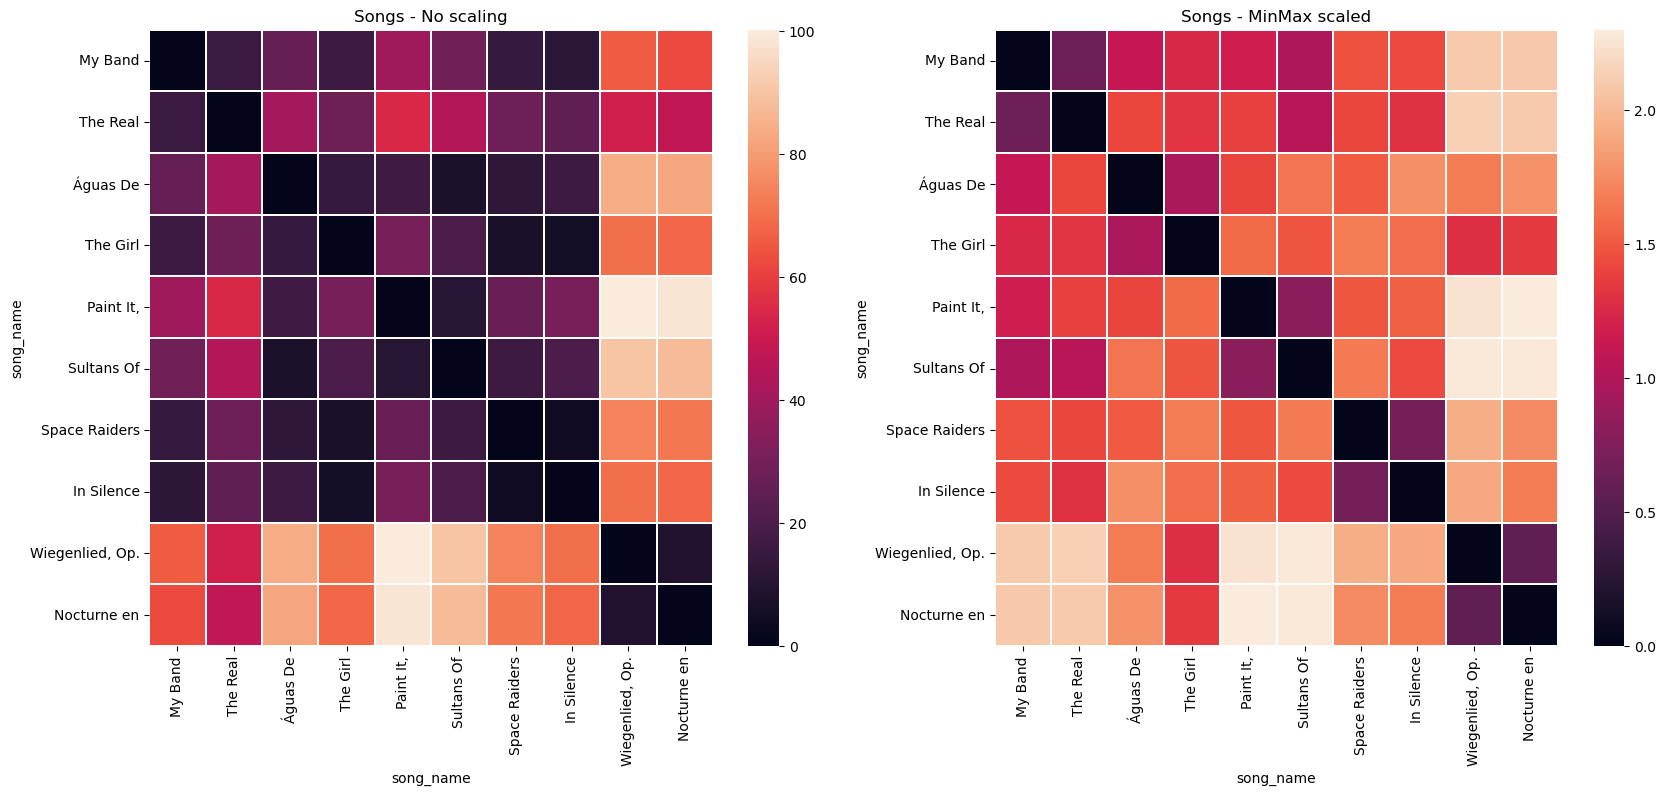

In [52]:
# Making the DataFrame for the MinMaxed heatmap
songs_scaled_minmax_distances = pd.DataFrame(pairwise_distances(df_songs_scaled_minmax),
                                         index=df_songs.index,
                                         columns=df_songs.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_not_scaled_distances, ax=ax1, linewidths=.2);
sns.heatmap(songs_scaled_minmax_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Songs - No scaling')
ax2.set_title('Songs - MinMax scaled')

plt.show()

In [ ]:
# Standard scaler

In [53]:
# Create a StandardScaler object
scaler = StandardScaler().set_output(transform="pandas")

# Scale the df_songs DataFrame
songs_scaled_standard = scaler.fit_transform(df_songs)

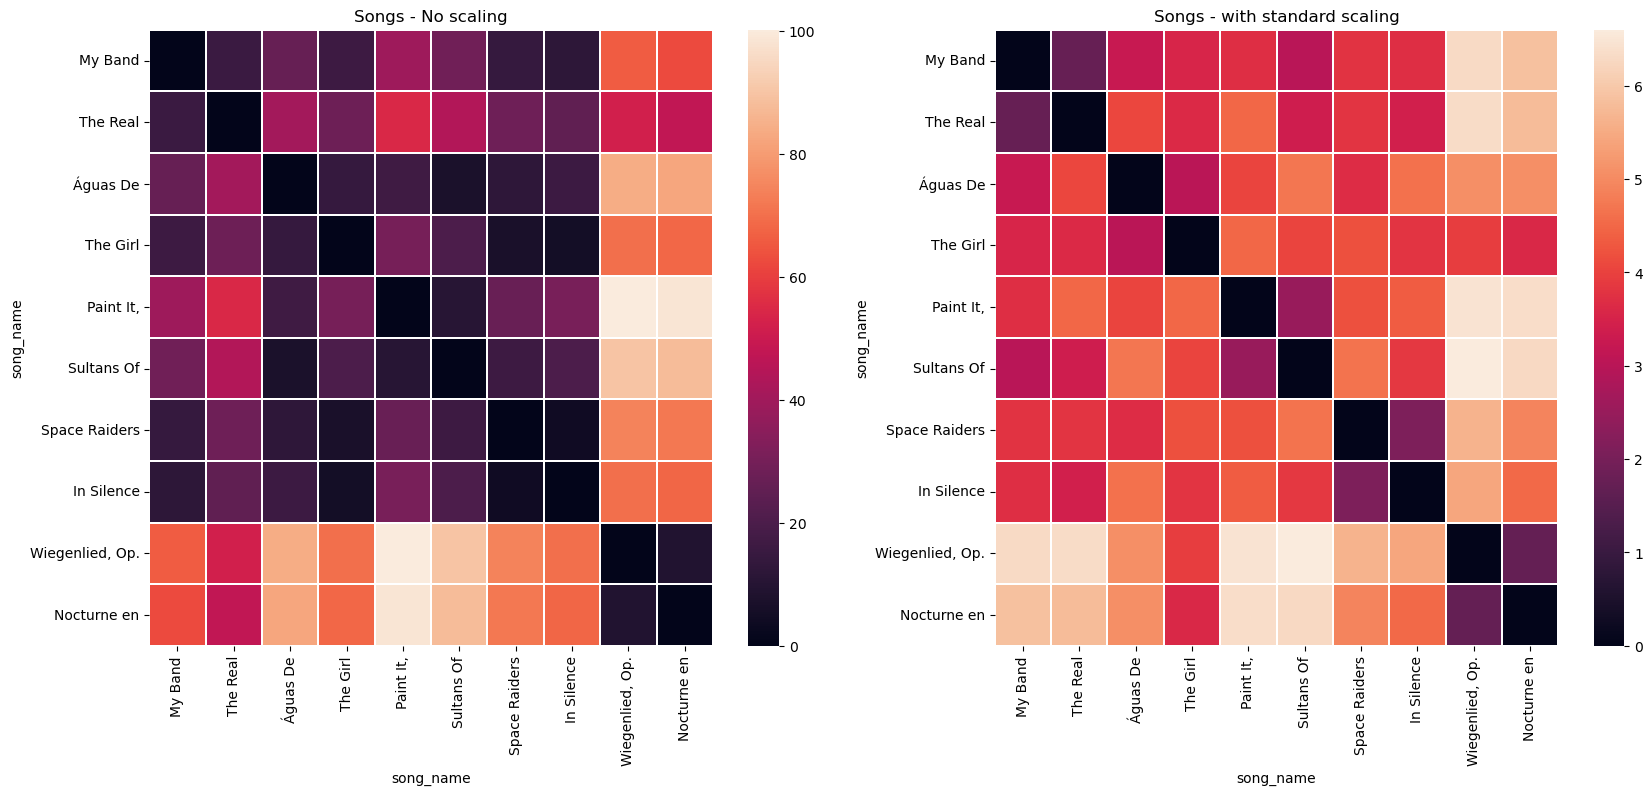

In [54]:
# Making the DataFrame for the MinMaxed heatmap
songs_scaled_standard_distances = pd.DataFrame(pairwise_distances(songs_scaled_standard),
                                         index=df_songs.index,
                                         columns=df_songs.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_not_scaled_distances, ax=ax1, linewidths=.2);
sns.heatmap(songs_scaled_standard_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Songs - No scaling')
ax2.set_title('Songs - with standard scaling')

plt.show()

In [ ]:
# Robust scaler

In [55]:
# Create a RobustScaler object
scaler = RobustScaler().set_output(transform="pandas")

# Scale the foods_df DataFrame
songs_scaled_robust = scaler.fit_transform(df_songs)

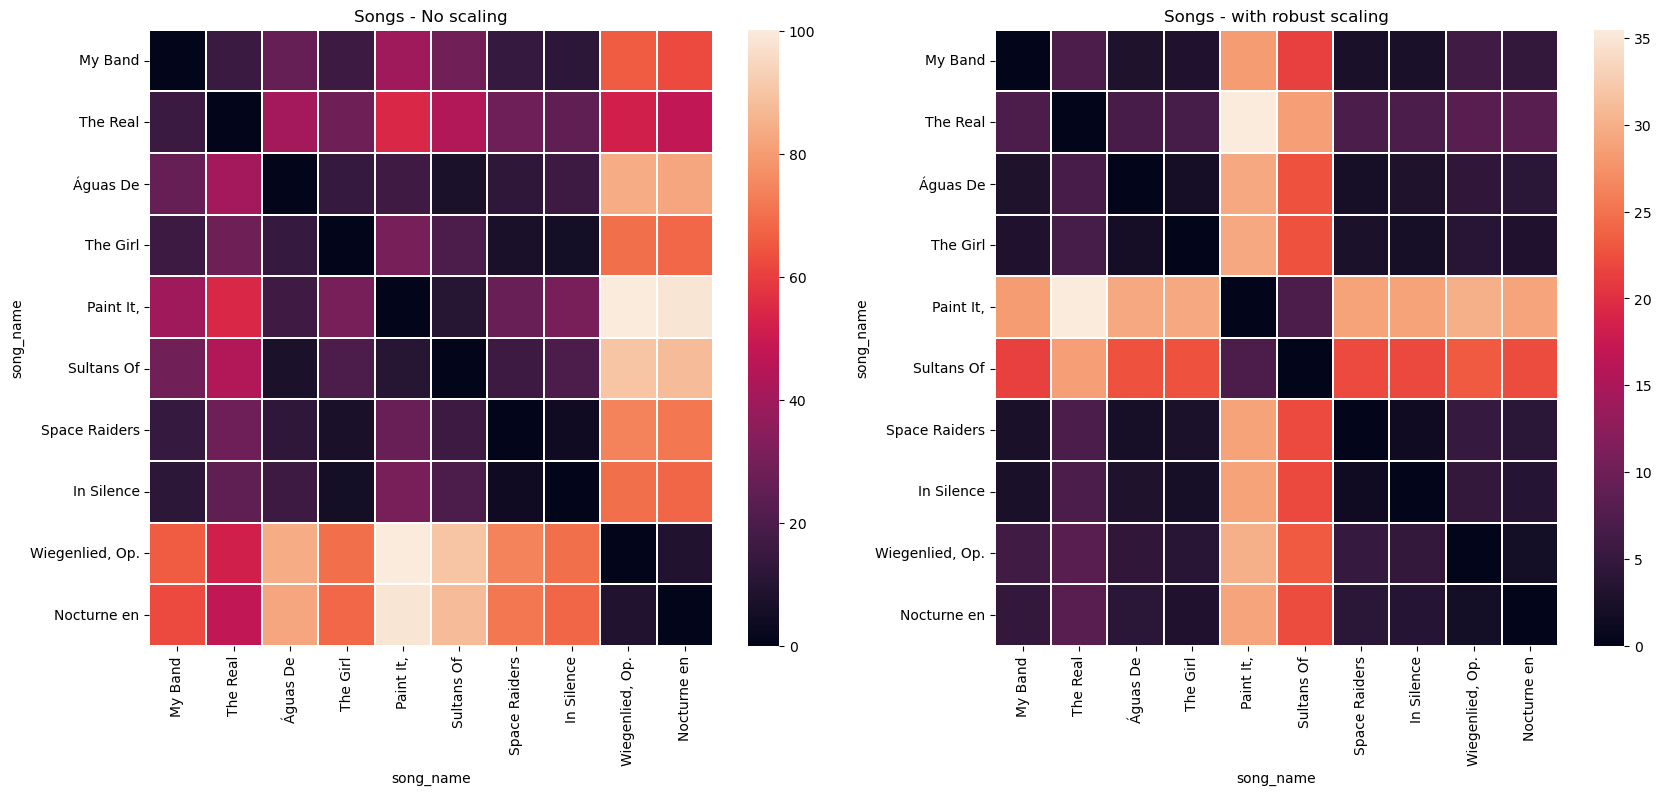

In [56]:
# Making the DataFrame for the MinMaxed heatmap
songs_scaled_robust_distances = pd.DataFrame(pairwise_distances(songs_scaled_robust),
                                         index=df_songs.index,
                                         columns=df_songs.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_not_scaled_distances, ax=ax1, linewidths=.2);
sns.heatmap(songs_scaled_robust_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Songs - No scaling')
ax2.set_title('Songs - with robust scaling')

plt.show()

In [ ]:
# Quantile transformer

In [57]:
# Number of samples
number_of_samples = df_songs.shape[0]

# Create a QuantileTransformer object
scaler = QuantileTransformer(n_quantiles = number_of_samples).set_output(transform="pandas")

# Transform the foods_df DataFrame
songs_scaled_quantile = scaler.fit_transform(df_songs)

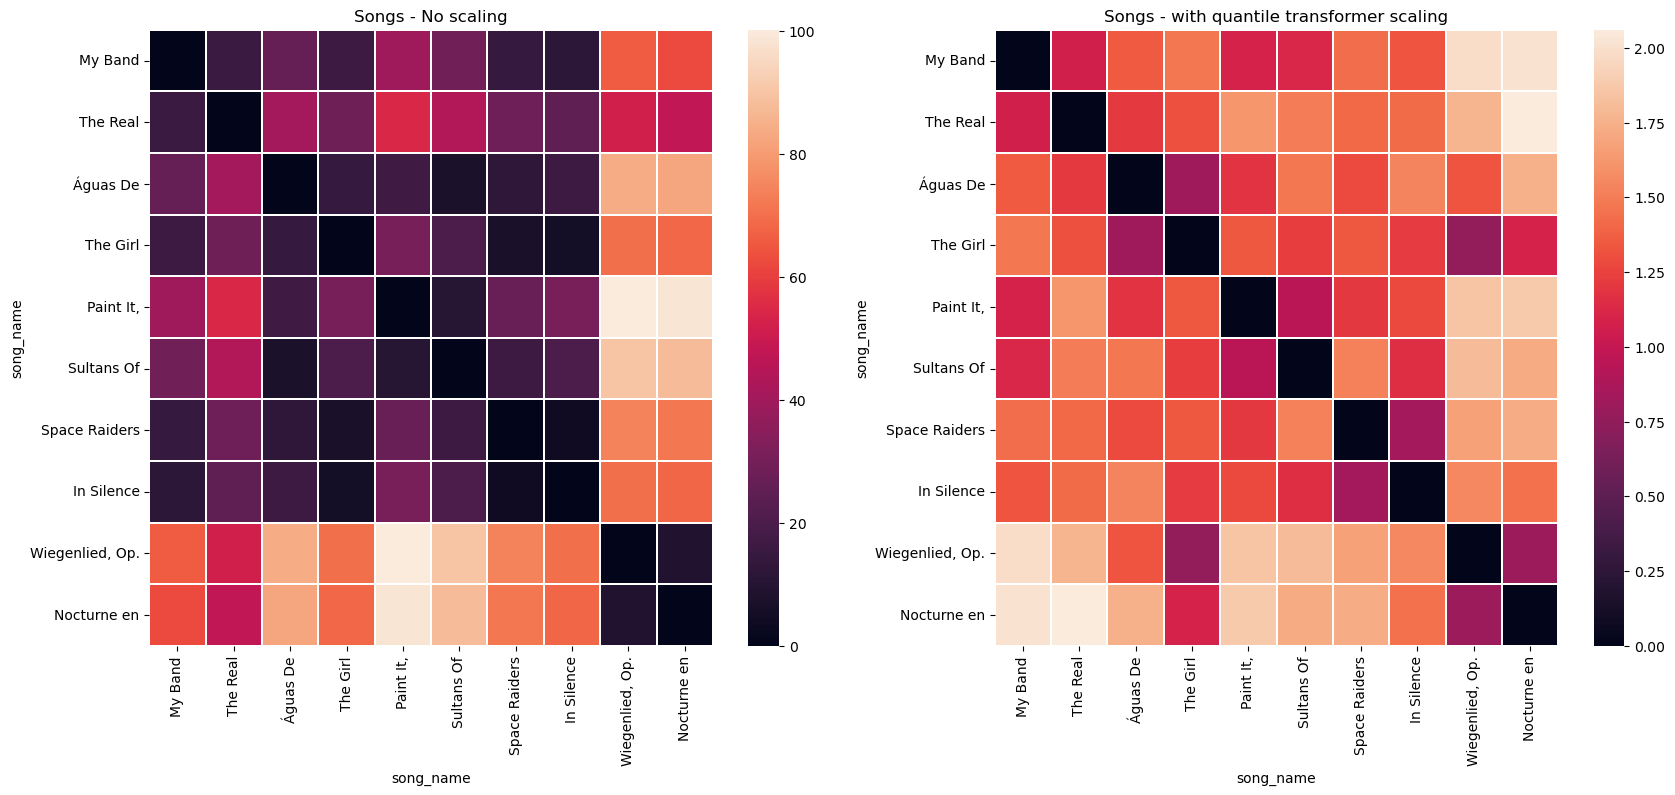

In [58]:
# Making the DataFrame for the Quantile heatmap
songs_scaled_quantile_distances = pd.DataFrame(pairwise_distances(songs_scaled_quantile),
                                           index=df_songs.index,
                                           columns=df_songs.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_not_scaled_distances, ax=ax1, linewidths=.2);
sns.heatmap(songs_scaled_quantile_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Songs - No scaling')
ax2.set_title('Songs - with quantile transformer scaling')
plt.show()

In [ ]:
# Power transformer

In [59]:
# Create a PowerTransformer object
scaler = PowerTransformer().set_output(transform="pandas")
"""
In this notebook we use the inline version of .set_output(transform="pandas")
Instead of the universal:
  from sklearn import set_config
  set_config(transform_output = "pandas")

This is because of a known bug when using the universal version with power transformer
https://github.com/scikit-learn/scikit-learn/issues/26443
"""

# Transform the foods_df DataFrame
songs_scaled_power = scaler.fit_transform(df_songs)

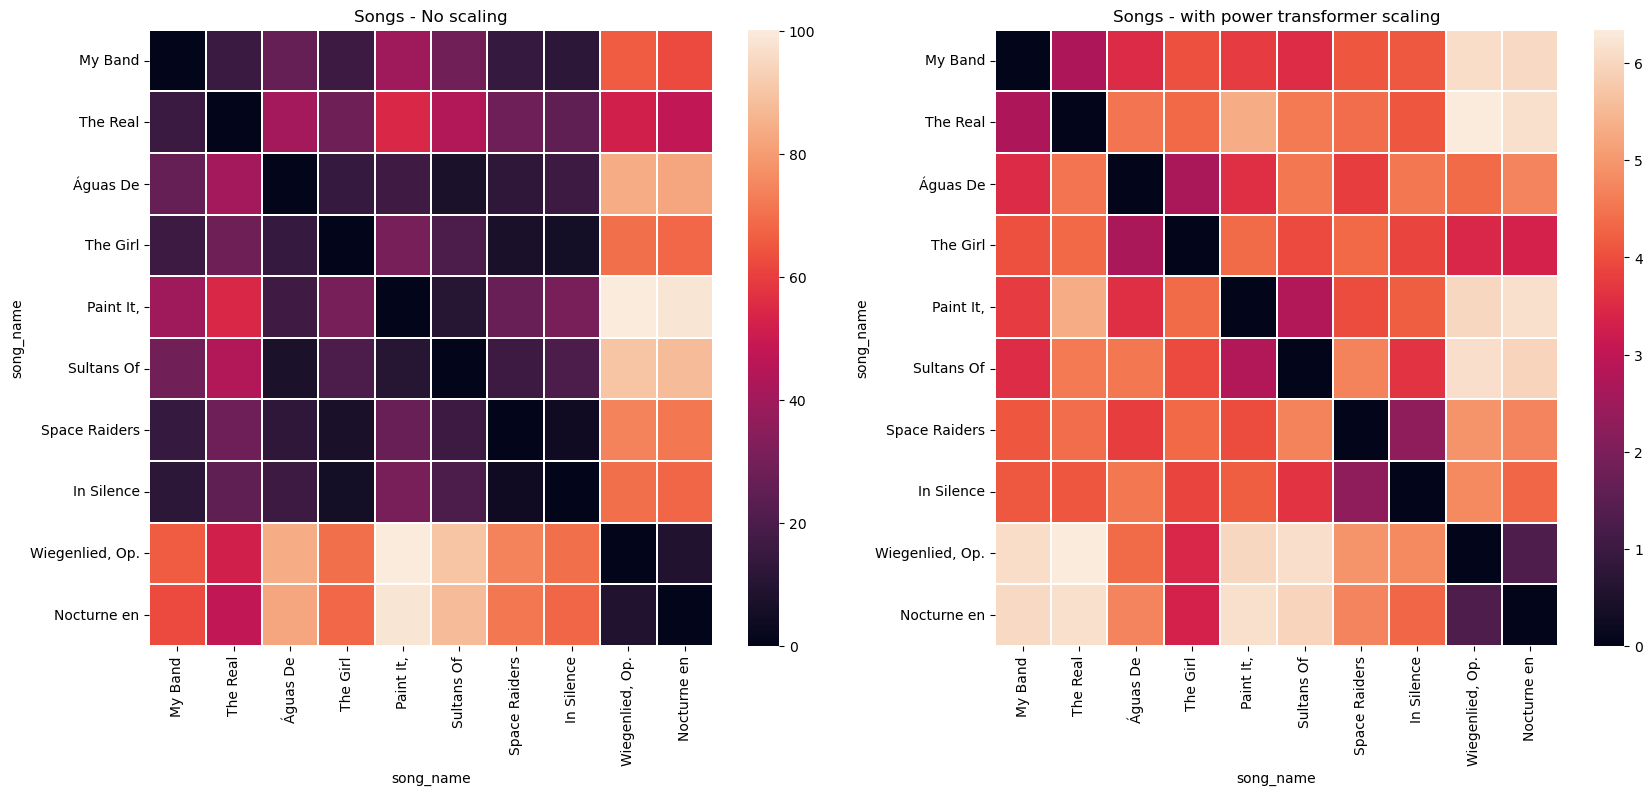

In [60]:
# Making the DataFrame for the Quantile heatmap
songs_scaled_power_distances = pd.DataFrame(pairwise_distances(songs_scaled_power),
                                           index=df_songs.index,
                                           columns=df_songs.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_not_scaled_distances, ax=ax1, linewidths=.2);
sns.heatmap(songs_scaled_power_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Songs - No scaling')
ax2.set_title('Songs - with power transformer scaling')
plt.show()

In [ ]:
# Comparing all 6 scaling methods

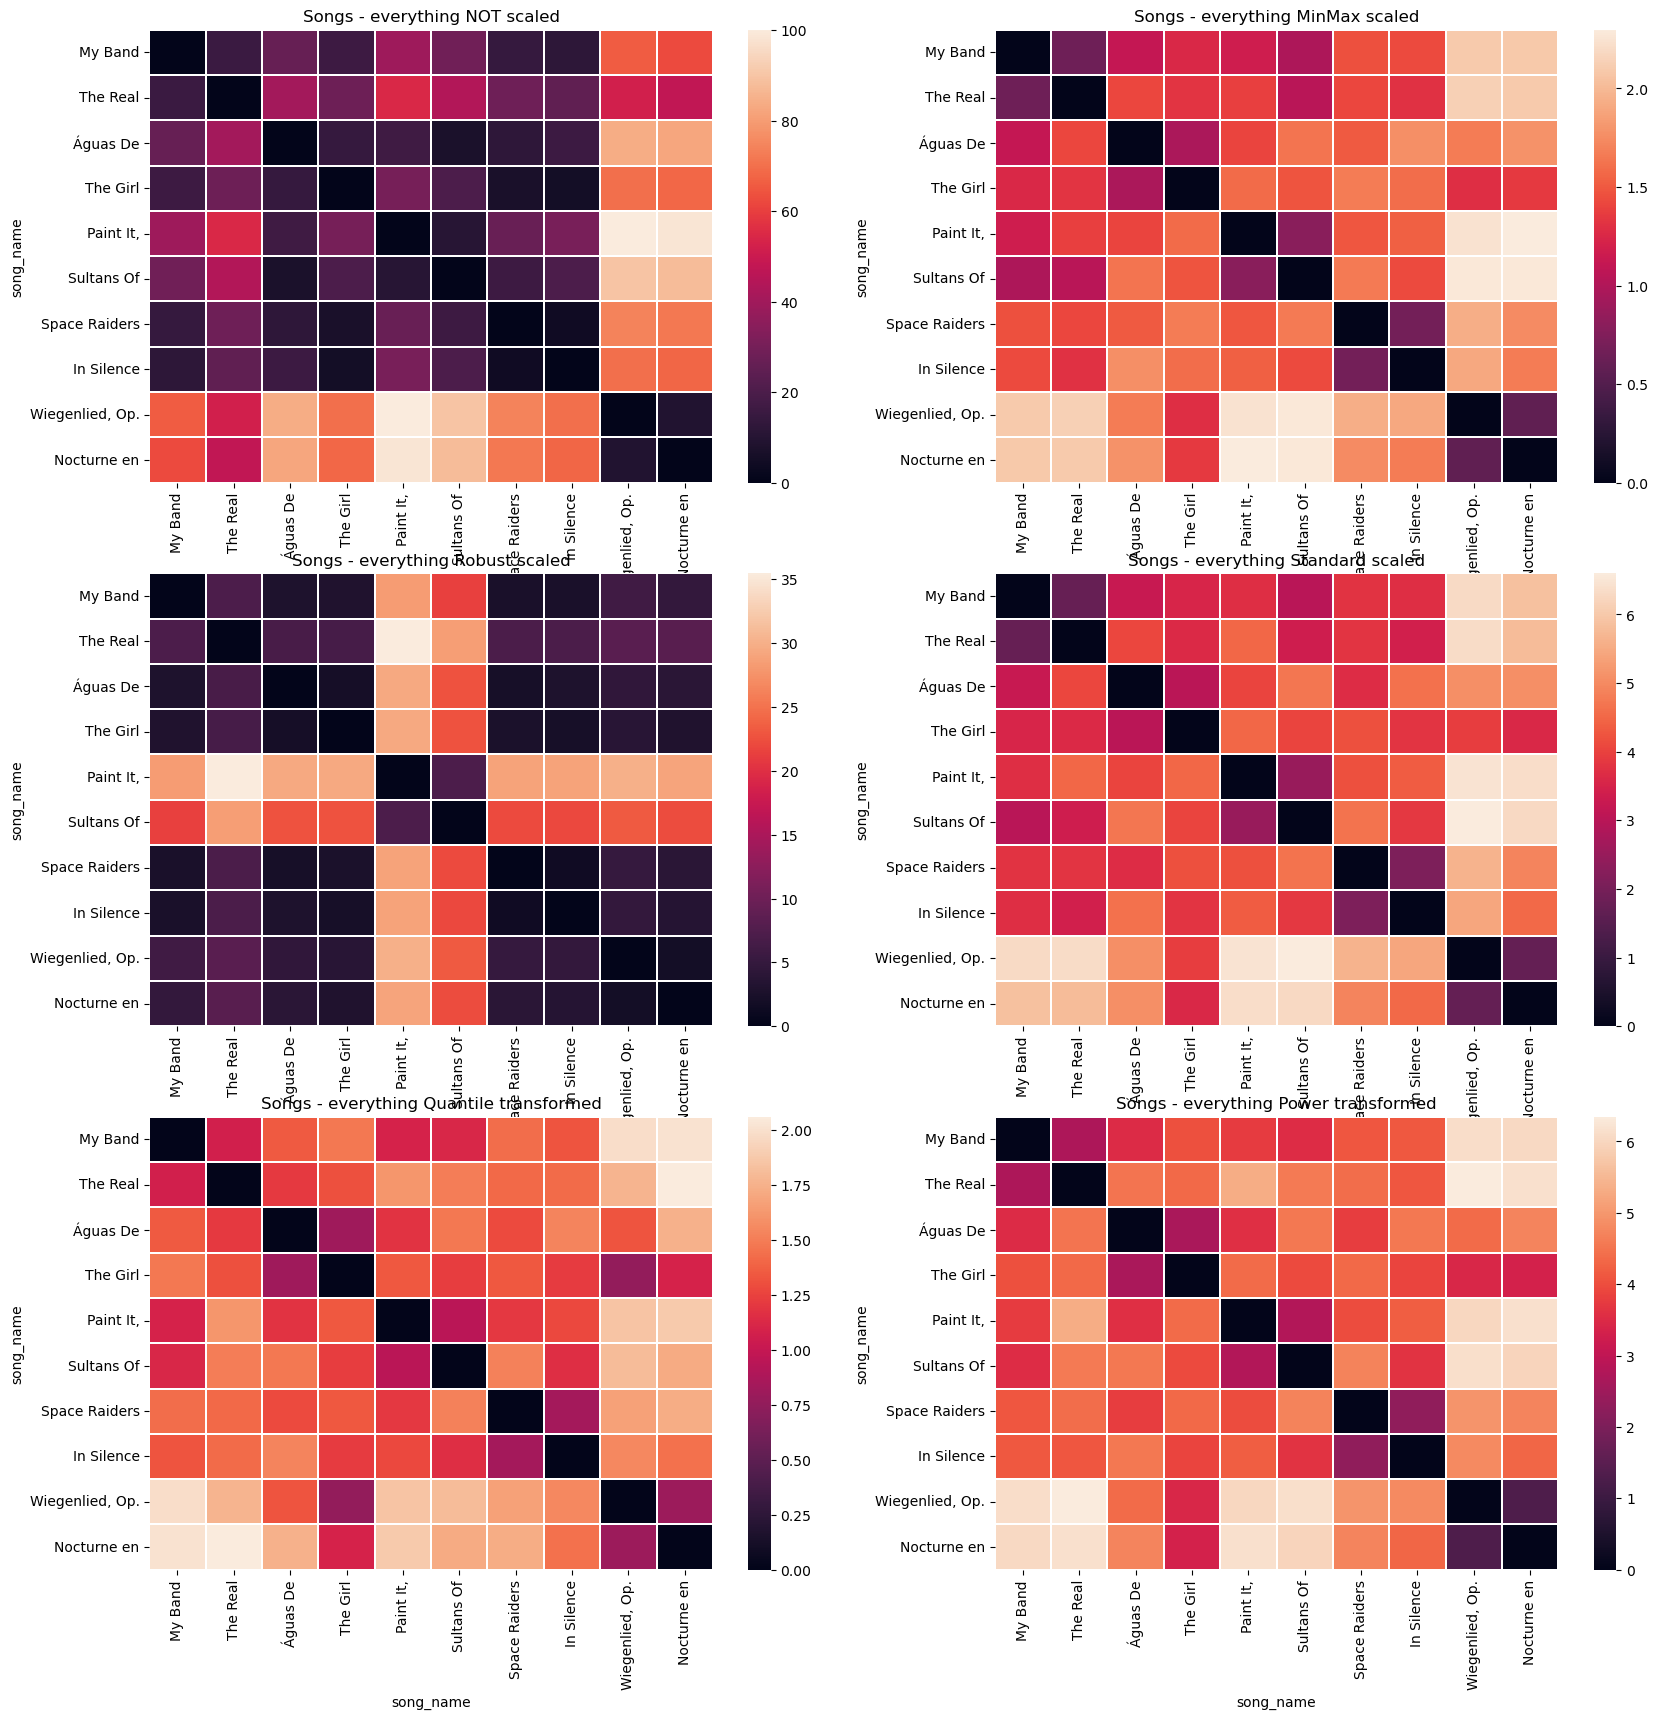

In [61]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.heatmap(songs_not_scaled_distances, ax=ax[0, 0], linewidths=.2);
sns.heatmap(songs_scaled_minmax_distances, ax=ax[0, 1], linewidths=.2);
sns.heatmap(songs_scaled_robust_distances, ax=ax[1, 0], linewidths=.2);
sns.heatmap(songs_scaled_standard_distances, ax=ax[1, 1], linewidths=.2);
sns.heatmap(songs_scaled_quantile_distances, ax=ax[2, 0], linewidths=.2);
sns.heatmap(songs_scaled_power_distances, ax=ax[2, 1], linewidths=.2);

ax[0, 0].set_title('Songs - everything NOT scaled')
ax[0, 1].set_title('Songs - everything MinMax scaled')
ax[1, 0].set_title('Songs - everything Robust scaled')
ax[1, 1].set_title('Songs - everything Standard scaled')
ax[2, 0].set_title('Songs - everything Quantile transformed')
ax[2, 1].set_title('Songs - everything Power transformed')

plt.show()

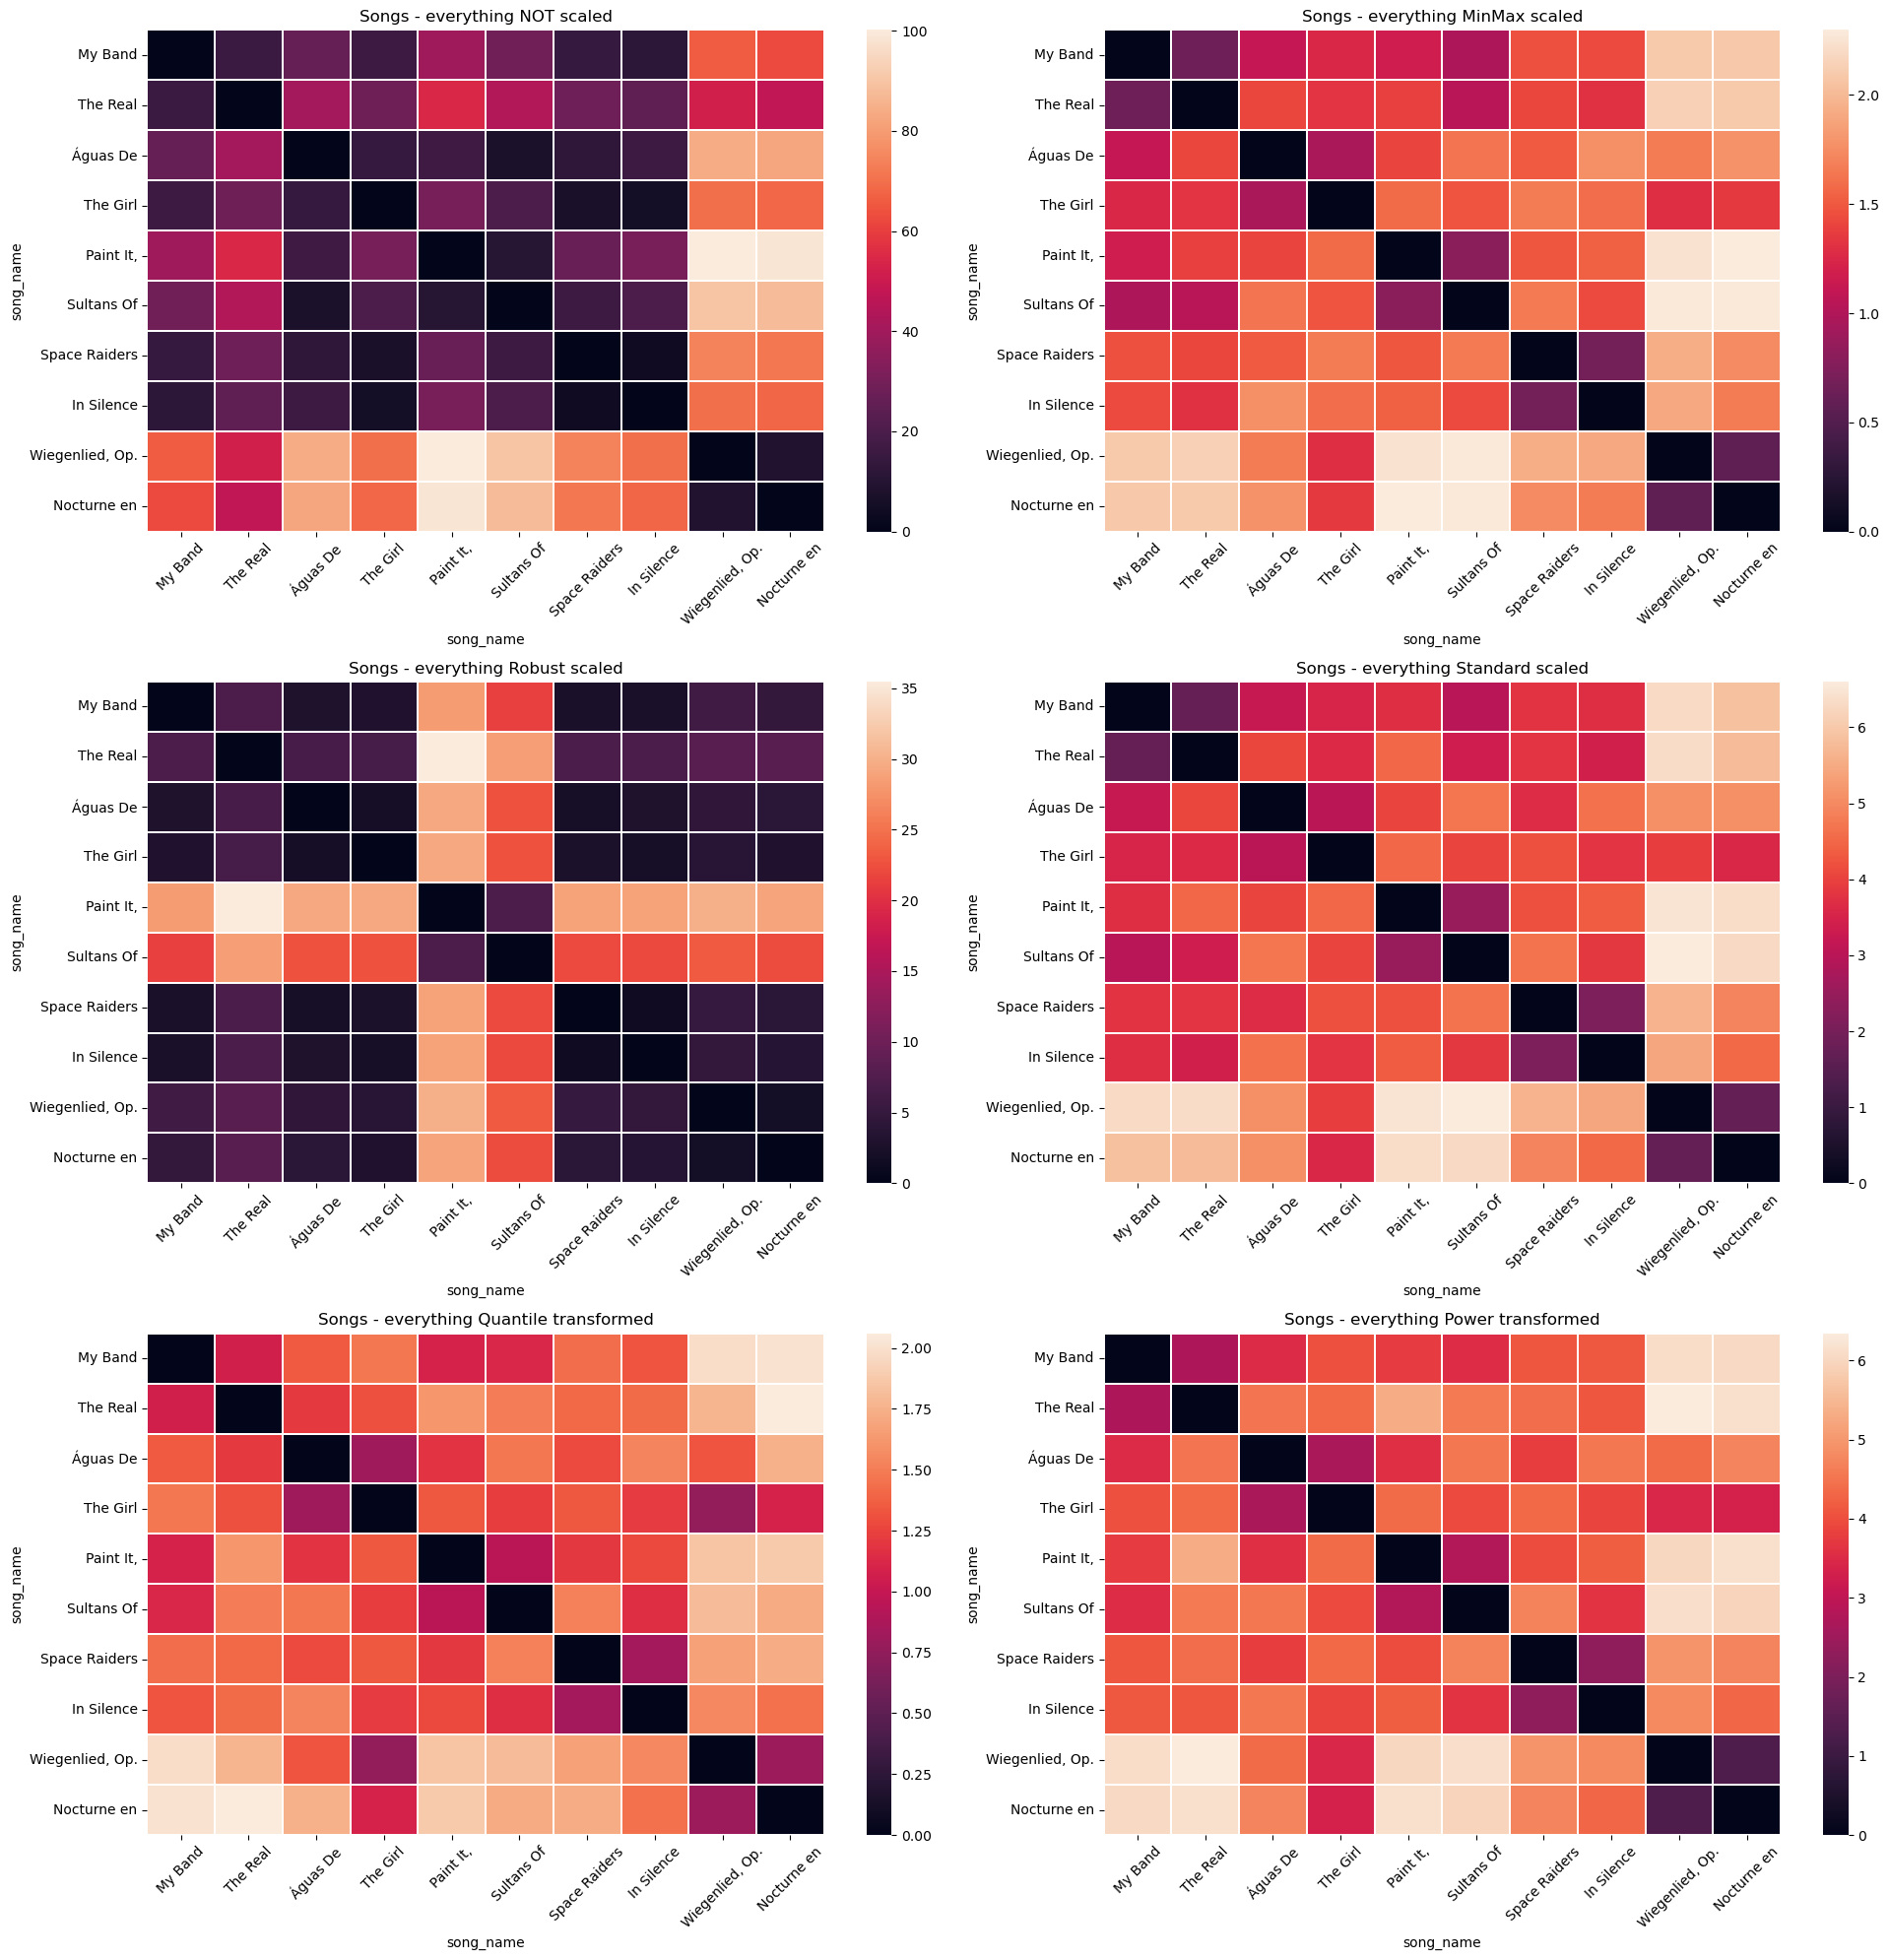

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# Plotting the heatmaps
sns.heatmap(songs_not_scaled_distances, ax=ax[0, 0], linewidths=.2)
sns.heatmap(songs_scaled_minmax_distances, ax=ax[0, 1], linewidths=.2)
sns.heatmap(songs_scaled_robust_distances, ax=ax[1, 0], linewidths=.2)
sns.heatmap(songs_scaled_standard_distances, ax=ax[1, 1], linewidths=.2)
sns.heatmap(songs_scaled_quantile_distances, ax=ax[2, 0], linewidths=.2)
sns.heatmap(songs_scaled_power_distances, ax=ax[2, 1], linewidths=.2)

# Setting the titles
ax[0, 0].set_title('Songs - everything NOT scaled')
ax[0, 1].set_title('Songs - everything MinMax scaled')
ax[1, 0].set_title('Songs - everything Robust scaled')
ax[1, 1].set_title('Songs - everything Standard scaled')
ax[2, 0].set_title('Songs - everything Quantile transformed')
ax[2, 1].set_title('Songs - everything Power transformed')

# Rotating x-axis tick labels
for axes in ax:
    for axis in axes:
        axis.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# K-Means

In [87]:
# 1. import the model
from sklearn.cluster import KMeans

# 2. initialize the model
my_kmeans = KMeans(n_clusters= 4)

# 3. fit the model to the data
my_kmeans.fit(songs_scaled_power) # pass your scaled data here

# 4. obtain the cluster output
clusters = my_kmeans.labels_

# 5. attach the cluster output to our original DataFrame
songs_scaled_power["cluster"] = clusters

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [89]:
songs_scaled_power

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
song_name,,,,,,,,,,
My Band,1.075317,1.078305,1.669676,0.701909,0.374746,-0.851856,-0.078481,1.224185,-0.153505,3
The Real,1.730514,0.308997,1.413297,-0.081333,-0.970704,-0.851869,-1.947847,1.000002,-0.666126,3
Águas De,-0.100289,-0.718947,-0.404512,1.644350,1.020441,-0.851869,-0.291008,0.208391,0.806331,3
The Girl,-0.105232,-1.187652,-0.535188,-0.869985,1.040181,-0.841586,-0.291008,-0.130399,0.200589,0
"Paint It,",-0.885990,0.843867,0.387232,0.927359,-0.897346,-0.836773,1.782122,0.579637,1.559634,2
Sultans Of,0.376040,0.839630,0.272369,-1.315126,-0.851966,-0.636517,1.635410,1.446581,1.029907,2
Space Raiders,0.465338,0.580179,0.152030,1.219075,-1.078428,1.276120,-0.172277,-1.392002,0.309201,1
In Silence,0.392654,1.060559,-0.001417,-0.935765,-1.068930,1.304629,-0.172277,-0.821776,0.148609,1
"Wiegenlied, Op.",-1.777817,-1.434535,-1.755960,-0.287525,1.215321,0.975409,-0.311480,-0.771330,-1.616974,0


In [90]:
songs_scaled_power.groupby(by='cluster').mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,
0,-1.017861,-1.330863,-1.162892,-0.720157,1.157396,0.482711,-0.251880,-0.748339,-1.011351
1,0.428996,0.820369,0.075307,0.141655,-1.073679,1.290374,-0.172277,-1.106889,0.228905
2,-0.254975,0.841748,0.329800,-0.193883,-0.874656,-0.736645,1.708766,1.013109,1.294770
3,0.901847,0.222785,0.892820,0.754975,0.141494,-0.851864,-0.772446,0.810860,-0.004433


In [91]:
centroids = my_kmeans.cluster_centers_
pd.DataFrame(centroids)

,0,1,2,3,4,5,6,7,8,9
0,-1.017861,-1.330863,-1.162892,-0.720157,1.157396,0.482711,-0.251880,-0.748339,-1.011351,2.220446e-16
1,0.428996,0.820369,0.075307,0.141655,-1.073679,1.290374,-0.172277,-1.106889,0.228905,1.000000e+00
2,-0.254975,0.841748,0.329800,-0.193883,-0.874656,-0.736645,1.708766,1.013109,1.294770,3.000000e+00
3,0.901847,0.222785,0.892820,0.754975,0.141494,-0.851864,-0.772446,0.810860,-0.004433,2.000000e+00
